In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('Data Final_Employee Attrition.csv')
df = df.rename(columns={'BusinessTravel':'Business Travel'})
import re
df = df.rename(columns=lambda col: re.sub(r"\s+", "_", col.lower()))
first_column = 'employee_number'
df = pd.concat([df[first_column], df.drop(columns=[first_column])], axis=1)

#Define only the numeric columns
cont = df.select_dtypes(include=[np.number])
#Drop ordinal columns
cont = cont.drop(columns= {'employee_number', 'standard_hours', 'education', 'environment_satisfaction', 'job_involvement', 'job_level', 'job_satisfaction', 'performance_rating', 'relationship_satisfaction', 'stock_option_level', 'work_life_balance'}, axis=1)
cont['attrition'] = df['attrition']
cont.insert(0, 'attrition', cont.pop('attrition'))

#From now on, the test will only apply for the records with 'attrition' = "Yes"
cont = cont.query('attrition == "Yes"')
cont = cont.drop(columns = 'attrition')
cont

,age,daily_rate,distance_from_home,hourly_rate,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,total_working_years,training_times_last_year,years_at_company,years_in_current_role,years_since_last_promotion,years_with_current_manager
0,41,1102,1,94,5993,19479,8,11,8,0,6,4,0,5
2,37,1373,2,92,2090,2396,6,15,7,3,0,0,0,0
14,28,103,24,50,2028,12947,5,14,6,4,4,2,0,3
21,36,1218,9,82,3407,6986,7,23,10,4,5,3,0,3
24,34,699,6,83,2960,17102,2,11,8,2,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,638,9,33,1790,26956,1,19,1,3,1,0,1,0
1442,29,1092,1,36,4787,26124,9,14,4,3,2,2,2,2
1444,56,310,7,72,2339,3666,8,11,14,4,10,9,9,8
1452,50,878,1,94,6728,14255,7,12,12,3,6,3,0,1


In [33]:
#Mean, median, mode comparison for normal distribution assessment
from scipy.stats import skew, kurtosis
from scipy.stats import sem

statistics = pd.DataFrame()

statistics['count'] = cont.count()
statistics['mean'] = cont.mean()
statistics['median'] = cont.median()
statistics['mode'] = cont.mode().iloc[0]
statistics['skewness'] = cont.skew()
statistics['std_err_skewness'] = sem(cont, axis=0)
statistics['kurtosis'] = cont.kurtosis()
statistics['std_err_kurtosis'] = sem(cont**4, axis=0)

statistics

,count,mean,median,mode,skewness,std_err_skewness,kurtosis,std_err_kurtosis
age,237,33.607595,32.0,29.0,0.715732,0.629391,-0.057044,1.631664e+05
daily_rate,237,750.362869,699.0,240.0,0.234153,26.106179,-1.134598,8.759511e+10
distance_from_home,237,10.632911,9.0,2.0,0.635903,0.549051,-0.860306,1.057851e+04
hourly_rate,237,65.573840,66.0,66.0,0.051689,1.305633,-1.152024,1.882039e+06
monthly_income,237,4787.092827,3202.0,2293.0,1.921147,236.457073,4.181845,1.379483e+15
monthly_rate,237,14559.308017,14618.0,9150.0,0.009252,468.219869,-1.194435,9.449526e+15
num_companies_worked,237,2.940928,1.0,1.0,0.864170,0.173988,-0.543064,1.045649e+02
percent_salary_hike,237,15.097046,14.0,11.0,0.859697,0.244907,-0.316156,5.310603e+03
total_working_years,237,8.244726,7.0,1.0,1.688158,0.465690,3.784098,1.783241e+04
training_times_last_year,237,2.624473,2.0,2.0,0.337787,0.081507,0.658225,1.573153e+01


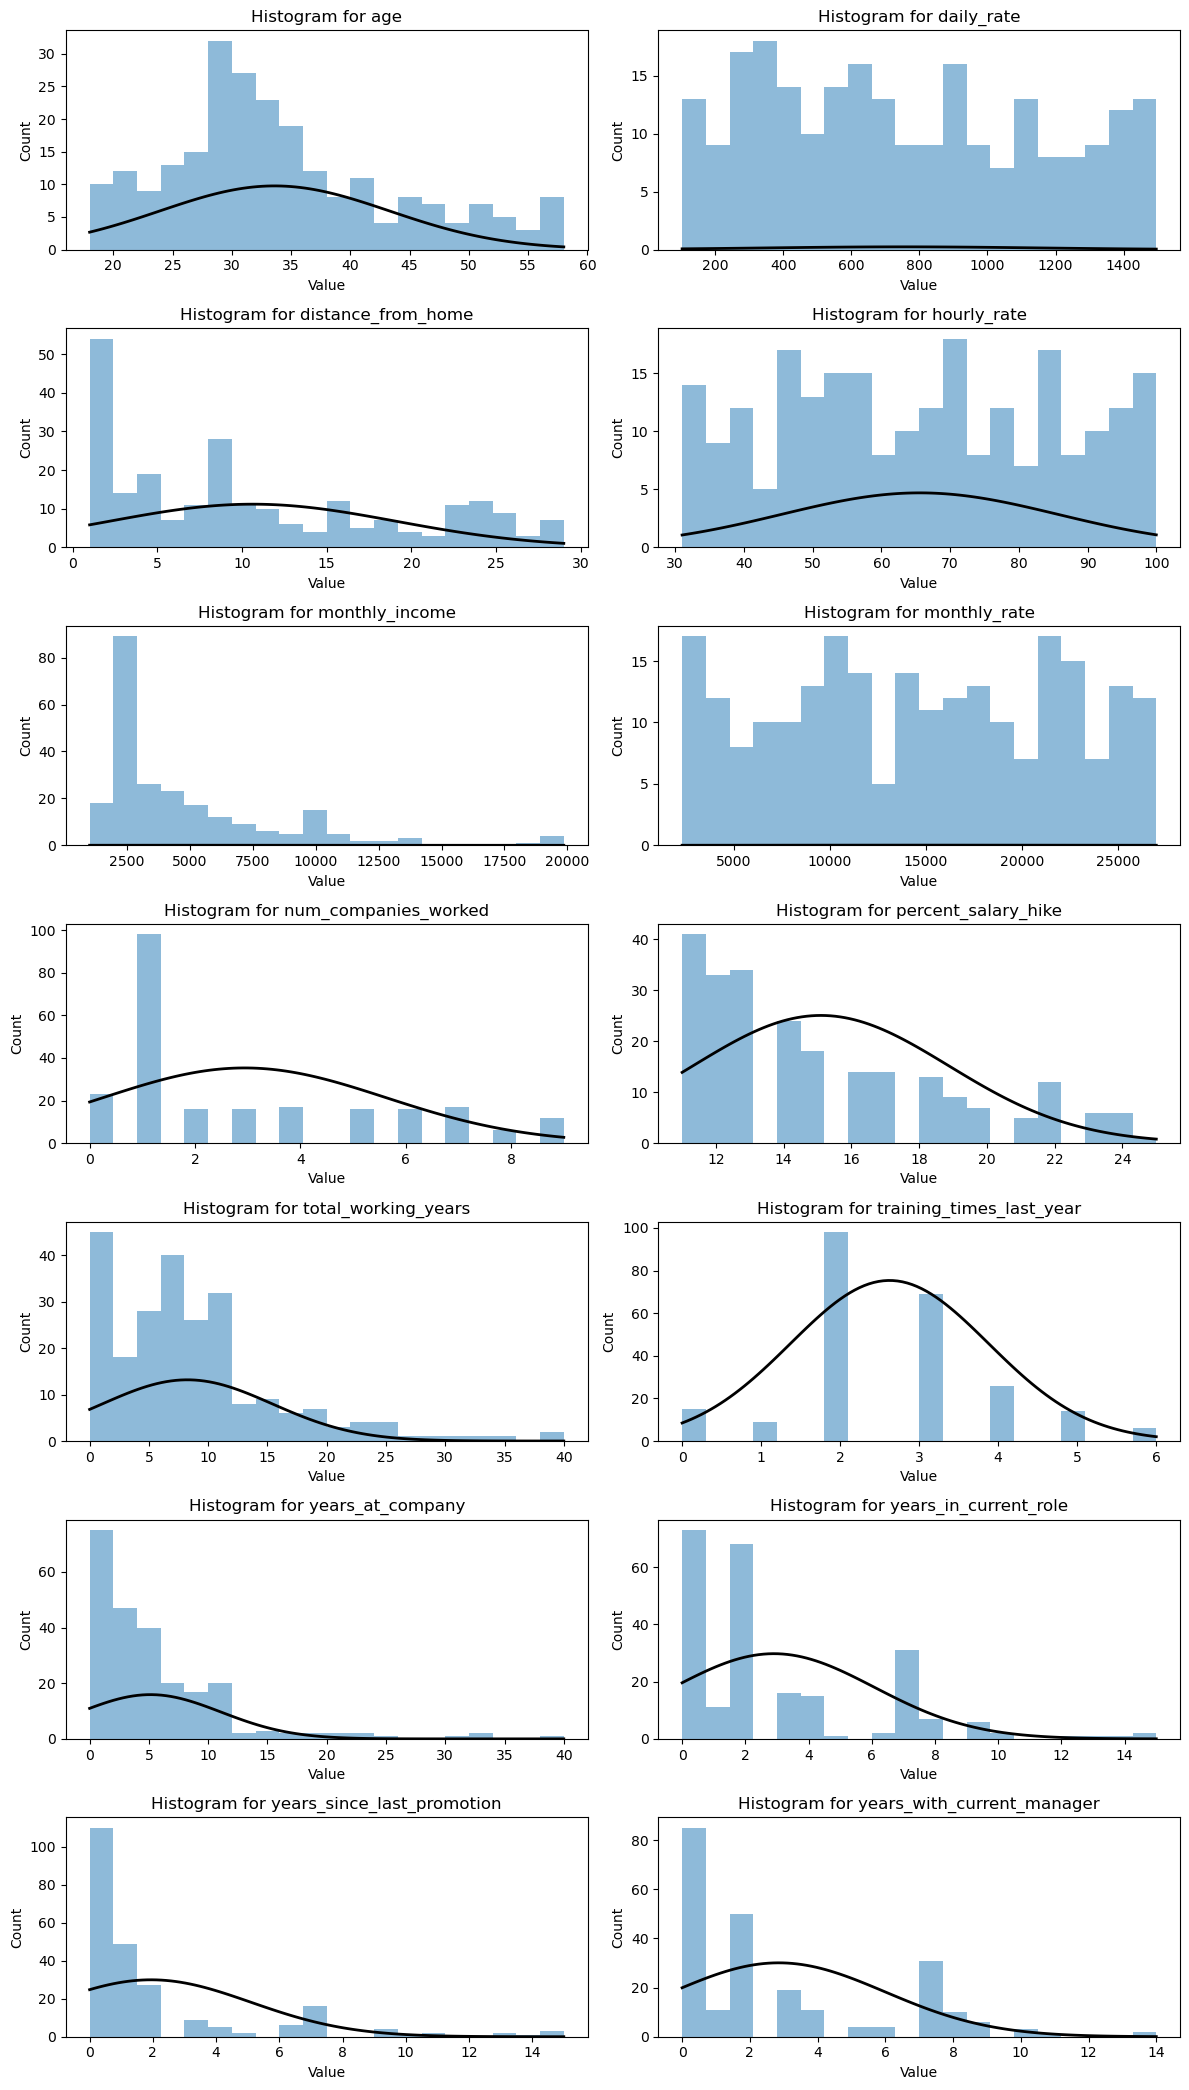

In [34]:
#Visually assess normal distribution
from scipy.stats import norm
import matplotlib.pyplot as plt

cont_columns = cont.columns
cont_columns_count = len(cont_columns)

fig, axes = plt.subplots(nrows=cont_columns_count // 2 + cont_columns_count % 2, ncols=2, figsize=(12, 3 * (cont_columns_count // 2 + cont_columns_count % 2)))

for i, column in enumerate(cont_columns):
    row = i // 2
    col = i % 2

    ax = axes[row, col]

    mu, sigma = cont[column].mean(), cont[column].std()

    # Skip plotting if sigma is zero (no variation)
    if sigma == 0:
        continue

    cont[column].plot.hist(bins=20, density=False, alpha=0.5, ax=ax)

    xmin, xmax = min(cont[column]), max(cont[column])
    x = np.linspace(xmin, xmax, 100)

    p = norm.pdf(x, mu, sigma)

    ax.plot(x, p * len(cont[column]), 'k', linewidth=2)

    ax.set_title(f'Histogram for {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

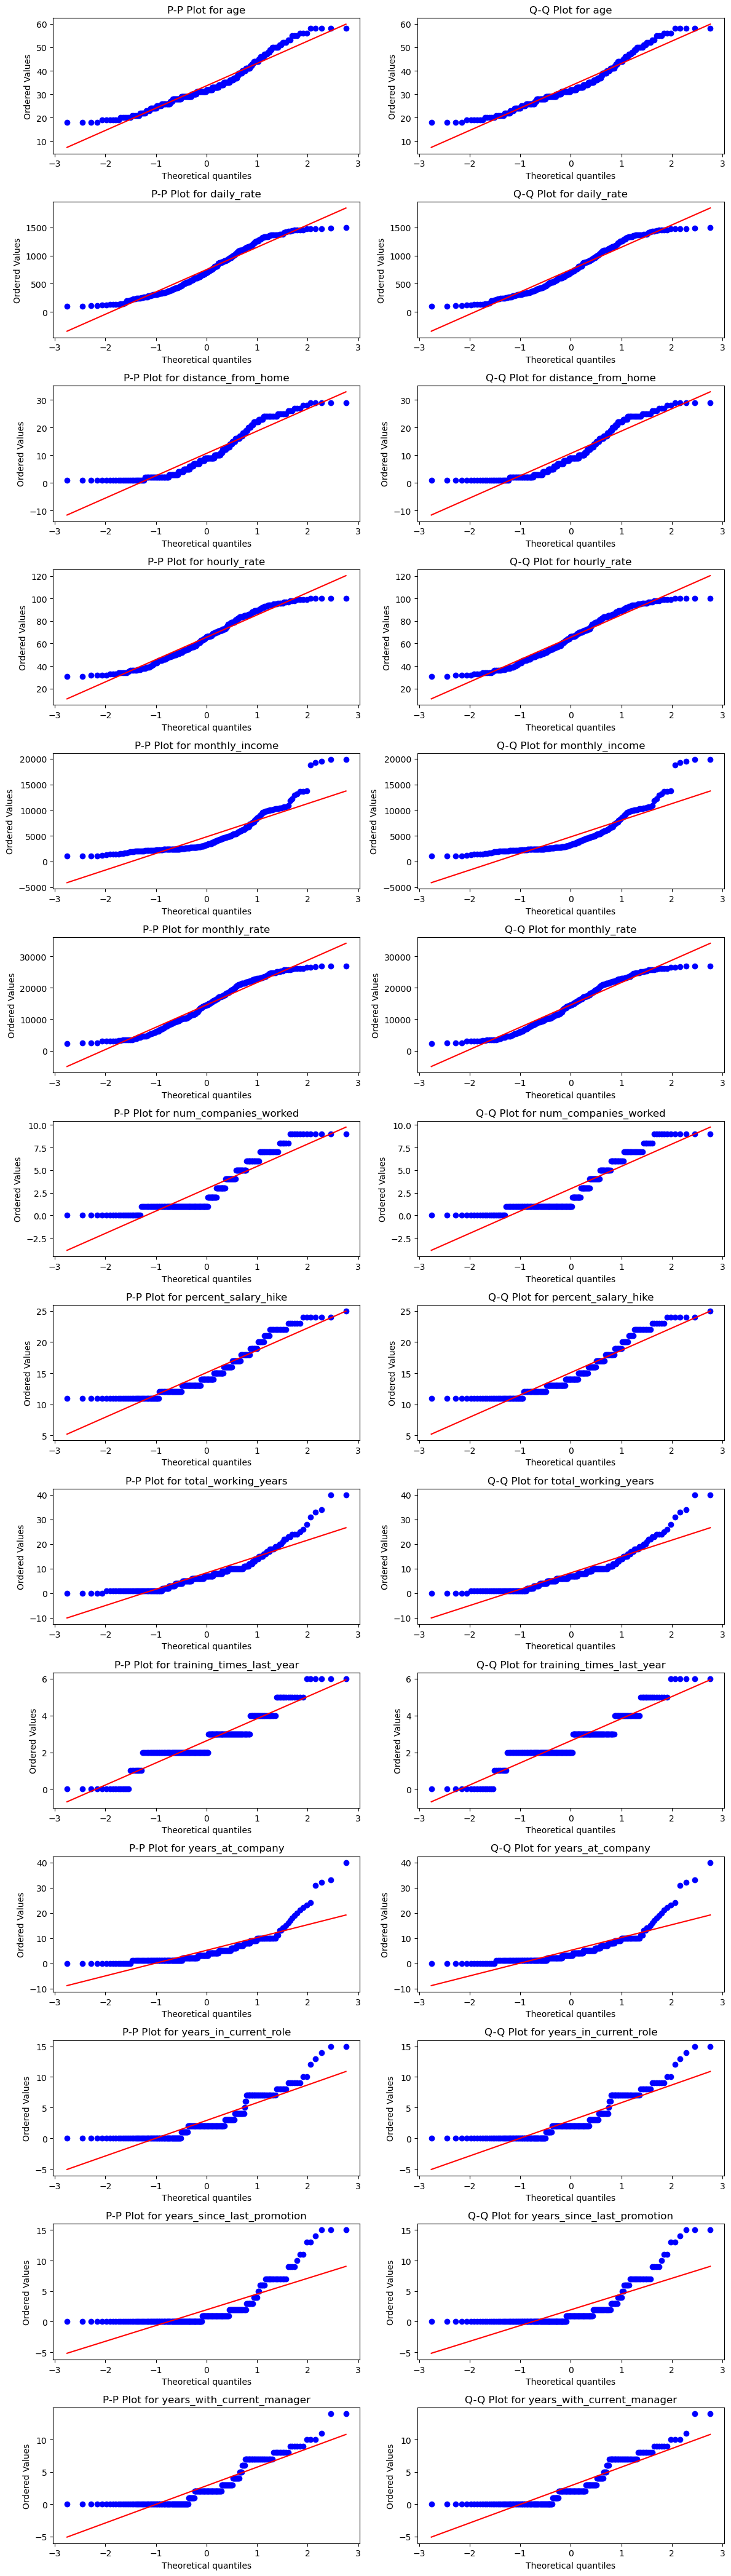

In [35]:
#Graphing P-P plots and Q-Q plots to assess normal distribution
cont_columns = cont.columns
cont_columns_count = len(cont_columns)
fig, axes = plt.subplots(nrows=cont_columns_count, ncols=2, figsize=(12, 3*cont_columns_count))

for i, column in enumerate(cont_columns):
    ax_pp = axes[i, 0]  # P-P plot
    ax_qq = axes[i, 1]  # Q-Q plot
    
    # P-P plot
    stats.probplot(cont[column], plot=ax_pp, fit=True)
    ax_pp.set_title(f'P-P Plot for {column}')

    # Q-Q plot
    stats.probplot(cont[column], dist='norm', plot=ax_qq)
    ax_qq.set_title(f'Q-Q Plot for {column}')

plt.tight_layout()
plt.show()

In [39]:
#Perform Shapiro Wilk test for normality
from scipy.stats import shapiro
import pandas as pd

def shapiro_test_for_normality(column):
    statistic, p_value = shapiro(column)

    alpha = 0.05

    is_normal = p_value > alpha

    return statistic, round(p_value, 2), is_normal

results_list = []

for column in cont.columns:
    statistic, p_value, is_normal = shapiro_test_for_normality(cont[column])
    results_list.append({
        'Column': column,
        'Shapiro Statistic': statistic,
        'P-value': p_value,
        'Is Normal': is_normal
    })

results_df = pd.concat([pd.DataFrame([result]) for result in results_list], ignore_index=True)
results_df

,Column,Shapiro Statistic,P-value,Is Normal
0,age,0.945708,0.0,False
1,daily_rate,0.949697,0.0,False
2,distance_from_home,0.895943,0.0,False
3,hourly_rate,0.956471,0.0,False
4,monthly_income,0.779897,0.0,False
5,monthly_rate,0.953494,0.0,False
6,num_companies_worked,0.834578,0.0,False
7,percent_salary_hike,0.885995,0.0,False
8,total_working_years,0.850000,0.0,False
9,training_times_last_year,0.901169,0.0,False
